# How Do Stats Stabilize?
### MSP 05.11.2017

How large of a sample size do we need to trust a given statistic?

Building off of analyzing batting average, we want to take individual games and find out what range of games (or PAs, or ABs, or pitches) we have to consider in order to get a picture of who a player actually is.

### Part I: Hitting Ratios


In [1]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from random import randrange
import scipy.stats as sst




In [15]:
# now read in all the data: it's a lot, but is set up this way so that
#  we can slice across batting order.

#
# general fangraphs data for players
#
# all with > 100 PA at given lineup position

def read_fielding_data(infile):
    BatData = np.genfromtxt(infile,\
                  dtype={'names': ("Rk","Player","xx","OAA","5out","5opp","5perc",\
                                   "4out","4opp","4perc","3out","3opp","3perc",\
                                  "2out","2opp","2perc","1out","1opp","1perc"),\
                         'formats': ('i2','S20','S20','f4','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4')},\
                 skip_header=0,delimiter=',')
    return BatData



Field2017   = read_fielding_data('data/statcast_fielding.dat')




def read_fielding_timing(infile):
    BatData = np.genfromtxt(infile,\
                  dtype={'names': ("Name","Team","Pos","G","GS","Inn","PO",\
                                   "A","E","FE","TE","DP","DPS",\
                                  "DPT","DPF","Scp","SB","CS","PB","WP","FP","TZ","id"),\
                         'formats': ('S20','S20','S20','f4','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4','f4','i4')},\
                 skip_header=0,delimiter=',')
    return BatData



FieldTime2017   = read_fielding_timing('data/fielding_time.dat')




In [16]:
print FieldTime2017['Inn']

[           nan  1107.19995117   946.           938.09997559  1040.19995117
  1242.19995117  1225.19995117  1070.           968.          1170.
  1286.19995117   907.          1341.          1338.           933.09997559
  1162.          1003.20001221  1391.19995117  1196.          1161.           936.
  1093.          1359.19995117   919.          1312.09997559   921.
  1178.19995117  1287.19995117  1000.          1201.          1283.09997559
  1197.          1120.          1354.          1084.          1174.19995117
   945.20001221  1137.09997559  1404.09997559   984.          1267.
  1241.19995117  1359.09997559  1146.09997559  1125.19995117  1064.
   941.20001221  1173.          1366.09997559   947.20001221  1047.09997559
   949.09997559  1293.09997559  1047.09997559  1039.09997559  1365.09997559
   908.20001221  1301.09997559  1275.           993.          1077.19995117
  1292.          1028.19995117  1093.          1240.           977.20001221
  1343.09997559  1353.09997559  1311.

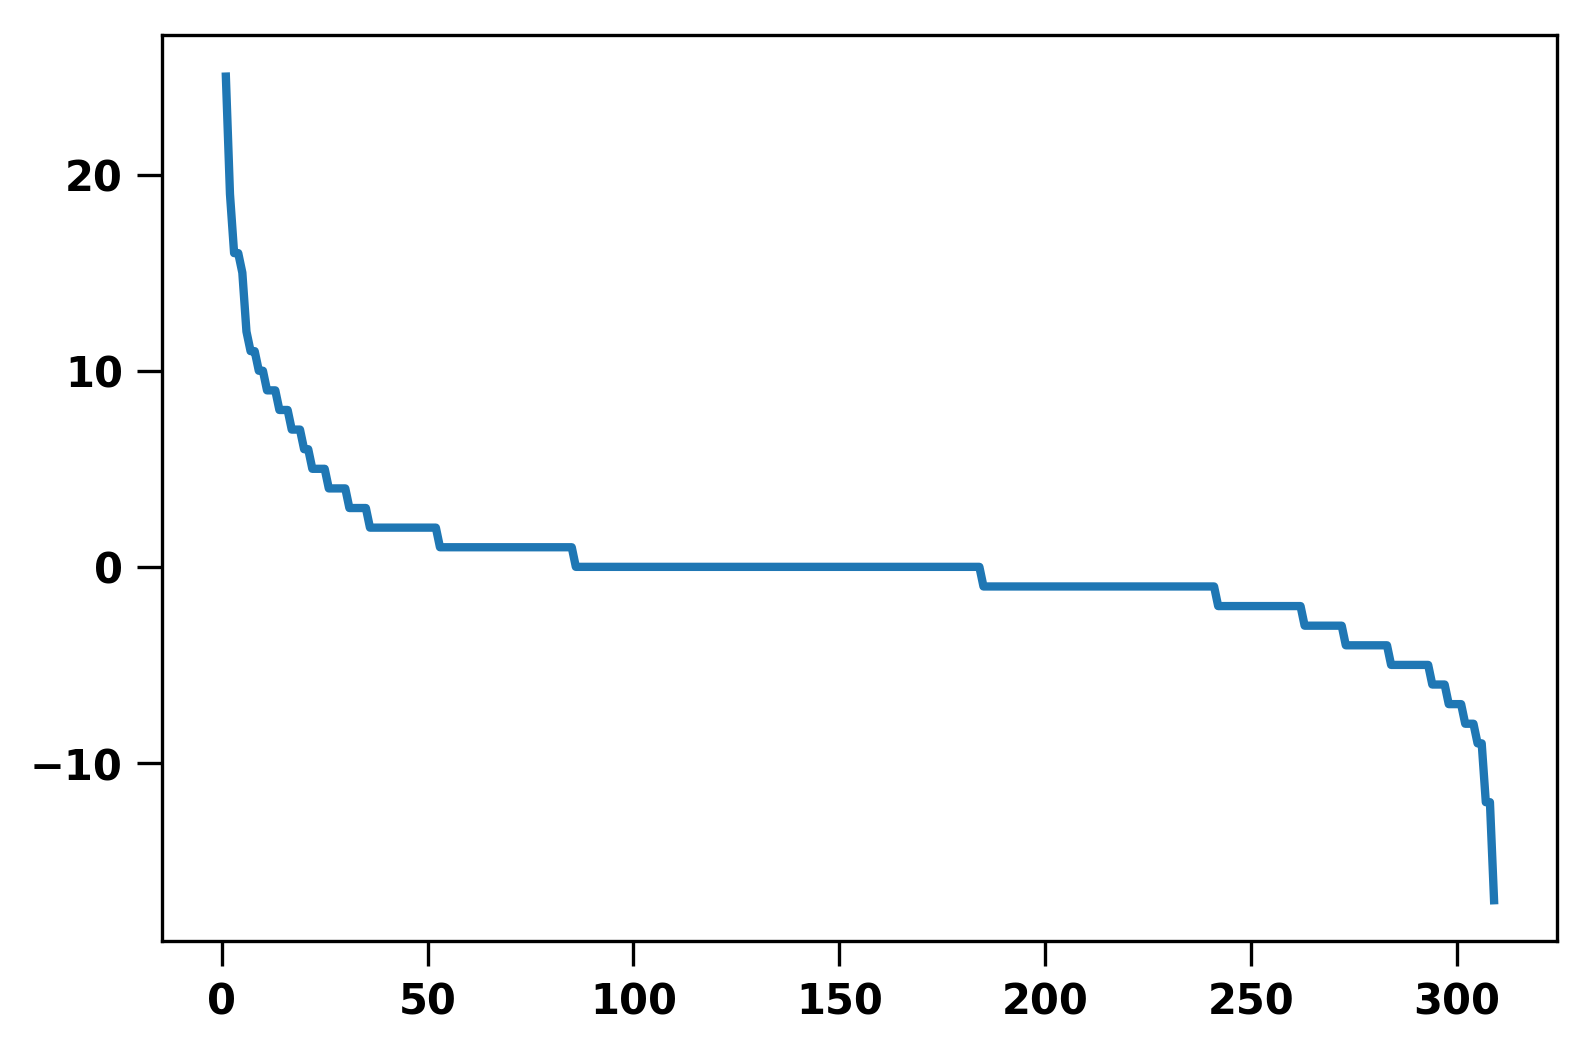

In [10]:
#Field2017['OAA']

plt.plot(Field2017['Rk'],Field2017['OAA'])

In [17]:
last_names =[x.split(';')[0] for x in Field2017['Player']]

In [21]:
oaa = np.zeros(len(last_names))
inn = np.zeros(len(last_names))

for pindx,player in enumerate(last_names):
    for nindx,name in enumerate(FieldTime2017['Name']):
        if player in name:
            oaa[pindx] = Field2017['OAA'][pindx]
            inn[pindx] = FieldTime2017['Inn'][nindx]

[-10, 27, 800, 1400]

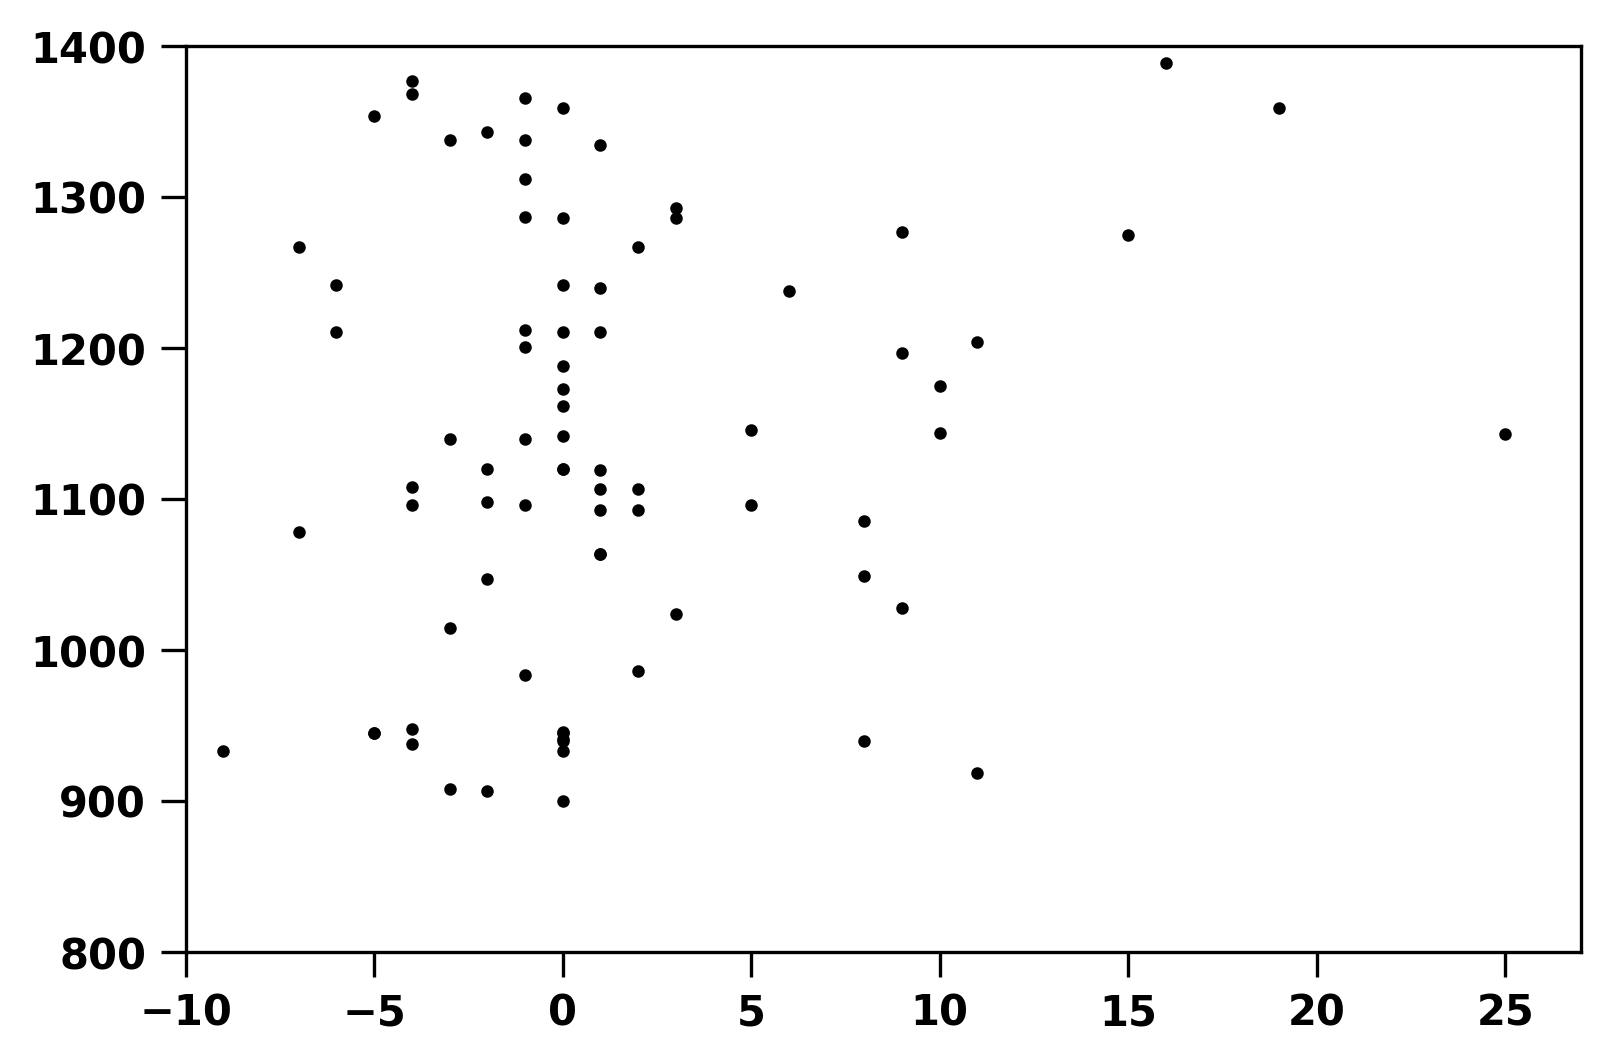

In [24]:
plt.scatter(oaa,inn,color='black',s=4.)

plt.axis([-10,27,800,1400])